In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import keras,os
from tensorflow.keras.models import Model , load_model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [7]:
my_generator= ImageDataGenerator(rescale=1./255, validation_split=0.2) #rescaled the images
my_image_generator_train = my_generator.flow_from_directory('/content/drive/MyDrive/Data/train', #this is the image generator next we need to read the data from it
        target_size=(150, 150),
        batch_size=32,
        class_mode='sparse',
        subset="training") #does not fully load the data into the memory instead it created a channel  
validation_image_generator= my_generator.flow_from_directory('/content/drive/MyDrive/Data/train',
        target_size=(150, 150),
        batch_size=32,
        subset="validation",
        class_mode='sparse' )
test = my_generator.flow_from_directory(
        directory='/content/drive/MyDrive/Data/test',
        shuffle=False,
        target_size=(150, 150),
        class_mode='sparse')

Found 10243 images belonging to 104 classes.
Found 2510 images belonging to 104 classes.
Found 3712 images belonging to 104 classes.


#Model Archtexture

In [14]:
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=104, activation="softmax"))

In [9]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model.compile(optimizer=opt, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

#Training

In [11]:
#checkpoint = ModelCheckpoint("f/content/drive/MyDrive/VGG16_2.h5", monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='loss', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(my_image_generator_train ,validation_data= validation_image_generator, epochs=15, callbacks=early)

Epoch 1/15
321/321 [==============================] - 101s 270ms/step - loss: 4.1979 - accuracy: 0.0589 - val_loss: 4.0557 - val_accuracy: 0.0697
Epoch 2/15
321/321 [==============================] - 90s 280ms/step - loss: 3.9008 - accuracy: 0.0830 - val_loss: 3.9055 - val_accuracy: 0.0797
Epoch 3/15
321/321 [==============================] - 90s 281ms/step - loss: 3.7091 - accuracy: 0.1192 - val_loss: 3.5264 - val_accuracy: 0.1375
Epoch 4/15
321/321 [==============================] - 90s 280ms/step - loss: 3.4057 - accuracy: 0.1564 - val_loss: 3.2720 - val_accuracy: 0.1781
Epoch 5/15
321/321 [==============================] - 90s 281ms/step - loss: 3.1863 - accuracy: 0.1846 - val_loss: 3.1112 - val_accuracy: 0.2040
Epoch 6/15
321/321 [==============================] - 90s 281ms/step - loss: 3.0017 - accuracy: 0.2210 - val_loss: 2.9980 - val_accuracy: 0.2307
Epoch 7/15
321/321 [==============================] - 90s 280ms/step - loss: 2.8568 - accuracy: 0.2507 - val_loss: 2.9228 - val_a

#Model Saving

In [12]:
VGG = model.save('/content/drive/MyDrive/Vgg')

#Graph

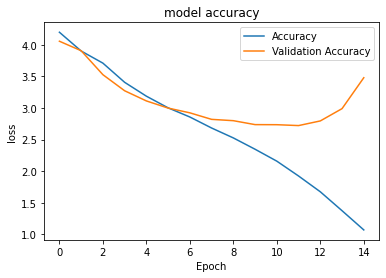

In [13]:
#plt.plot(hist.history["accuracy"])
#plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

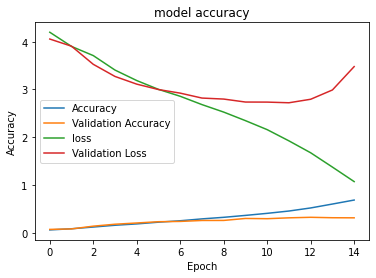

In [14]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

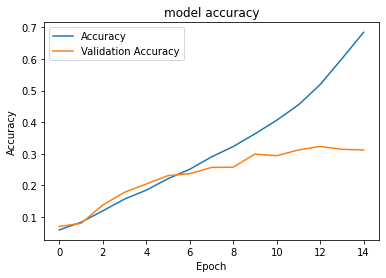

In [15]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

#Evaluating the model

In [15]:
m=load_model('/content/drive/MyDrive/Vgg')

In [17]:
score = m.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.5339882373809814
Test accuracy: 0.2957974076271057


#F-score and Confusion Matrix

In [8]:
testy = my_generator.flow_from_directory(
        directory='/content/drive/MyDrive/Data/test',
        target_size=(150, 150),
        batch_size=16474,
        class_mode='sparse')

for X_test, Y_test in testy:
   break 

Found 3712 images belonging to 104 classes.


#F-score

In [24]:
from sklearn.metrics import f1_score
y_true=testy.classes
y_pred=score
y_classes=[np.argmax(CLASSES) for CLASSES in y_pred]
f1_score(y_true, y_classes, average='macro')

ValueError: ignored

#Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix

y_predc = score
y_predc = np.argmax(y_predc, axis=0)

conf_mat = confusion_matrix(Y_test, y_predc)

TypeError: ignored

In [19]:
CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']
target_dict={k: v for v, k in enumerate(CLASSES)}
target_dict
target_val=  [target_dict[CLASSES[i]] for i in range(len(CLASSES))]